In [8]:
 #1: Import Necessary Libraries
# Importing Libraries
!pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report


In [9]:
#2: Load Dataset
# Loading the Dataset
df = pd.read_csv("C:/Users/Kanimozhi/Pictures/mental_health.csv", encoding="ISO-8859-1")
df.head()  # View the first few rows


,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [10]:
# 3: Data Exploration
# Explore the data
print(df.dtypes)
print(df["label"].unique())  # Unique labels


text     object
label     int64
dtype: object
[0 1]


C:\Users\Kanimozhi\AppData\Local\Temp\ipykernel_9652\731179000.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['label'].unique(), y=df['label'].value_counts(), palette='viridis')


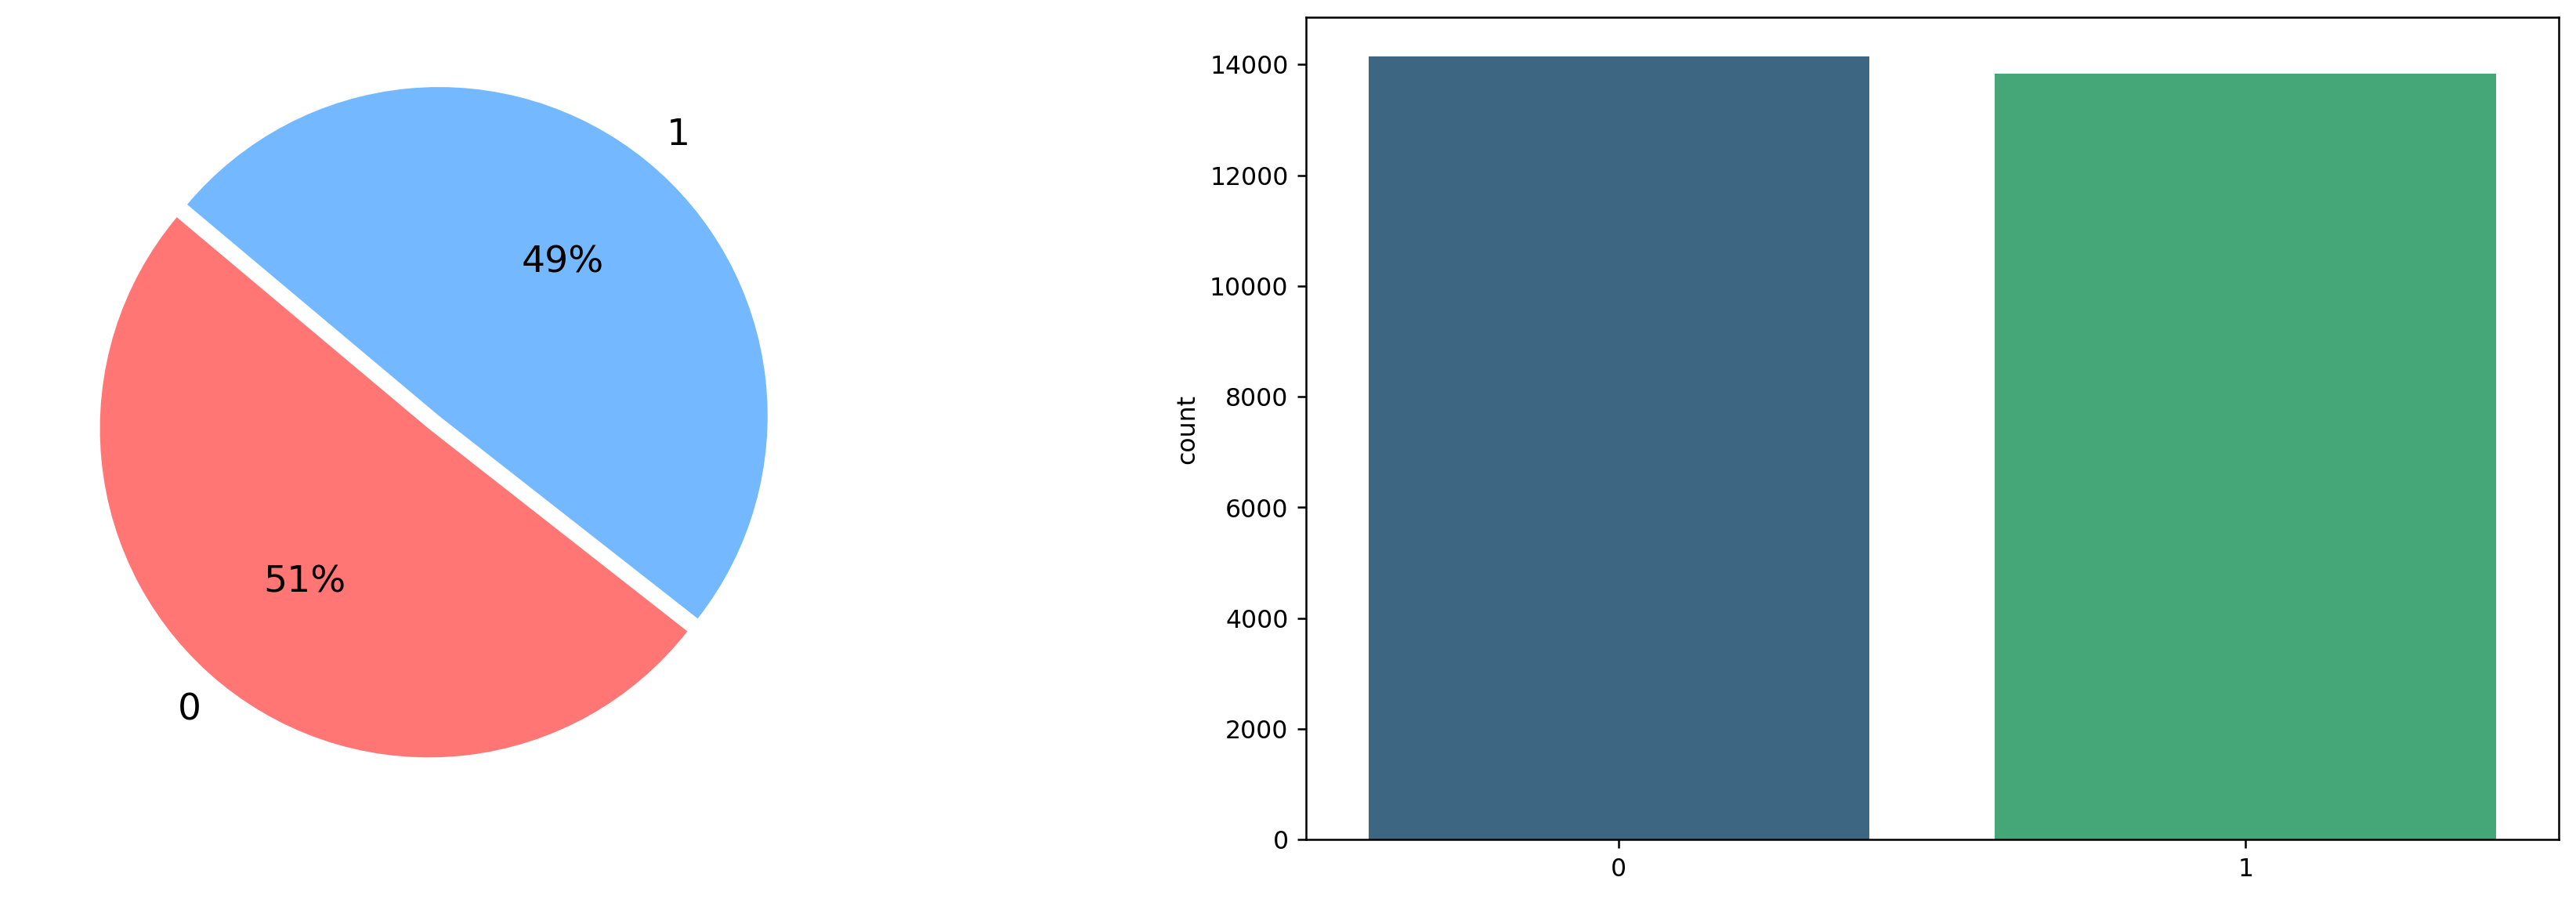

In [11]:
#4: Visualize Label Distribution
# Pie chart and bar plot for label distribution
labels = [0, 1]  # Assuming 0 = Negative, 1 = Positive
sizes = df['label'].value_counts()  # Dynamically get the sizes
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, textprops={'fontsize': 15}, startangle=140, 
        autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x=df['label'].unique(), y=df['label'].value_counts(), palette='viridis')
plt.show()


In [24]:
# 5: Text Preprocessing
import pandas as pd
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Ensure required resources are installed
nltk.download('punkt')

# Load your dataset (replace the file path with the path to your actual CSV file)
df = pd.read_csv("C:/Users/Kanimozhi/Pictures/mental_health.csv")  # Adjust this path based on your actual file location

# Initialize stemmer
stemmer = PorterStemmer()

# Enable the tqdm progress bar in pandas
tqdm.pandas()

# Clean and stem function
def clean_and_stem(text):
    return " ".join([stemmer.stem(token.lower()) for token in word_tokenize(text) if len(token) > 2])

# Apply cleaning and stemming with progress
df['cleaned_text'] = df['text'].str.replace('[^a-zA-Z0-9]+', " ")  # Remove special characters
df['cleaned_text'] = df['cleaned_text'].progress_apply(clean_and_stem)  # Show progress

# Display the cleaned data
print(df[['text', 'cleaned_text']].head())



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kanimozhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|███████████████████████████████████████████████████████████████████████████| 27977/27977 [02:00<00:00, 232.43it/s]


                                                text  \
0  dear american teens question dutch person hear...   
1  nothing look forward lifei dont many reasons k...   
2  music recommendations im looking expand playli...   
3  im done trying feel betterthe reason im still ...   
4  worried  year old girl subject domestic physic...   

                                        cleaned_text  
0  dear american teen question dutch person heard...  
1  noth look forward lifei dont mani reason keep ...  
2  music recommend look expand playlist usual gen...  
3  done tri feel betterth reason still aliv know ...  
4  worri year old girl subject domest physicalmen...  


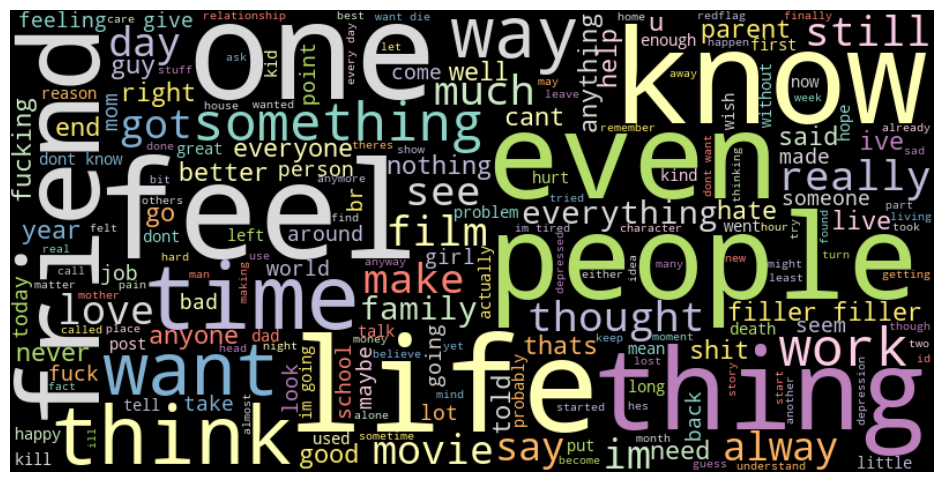

In [8]:
#6: Word Cloud Visualization
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset (make sure the file path is correct)
df = pd.read_csv("C:/Users/Kanimozhi/Pictures/mental_health.csv")

# Assuming your raw text is in a column named 'text'
if 'text' not in df.columns:
    print("The 'text' column is missing. Ensure the dataset has a 'text' column.")
else:
    # Function to clean text data
    def clean_text(text):
        # Remove special characters, numbers, and punctuations
        text = re.sub(r'[^A-Za-z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove extra spaces
        text = ' '.join(text.split())
        return text

    # Apply text cleaning to the 'text' column and create a 'cleaned_text' column
    df['cleaned_text'] = df['text'].apply(clean_text)

    # Check if the cleaned text column has been created successfully
    if 'cleaned_text' in df.columns:
        # Create the Word Cloud for the cleaned text
        text_corpus = ' '.join(df['cleaned_text'].values)
        
        # Generate the word cloud
        wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='black',  # Set background to black for contrast
            colormap='Set3',  # Use a diverse color palette
            max_words=200,  # Limit the number of words
            contour_color='white',  # Add a white contour around words
            contour_width=1,  # Set contour width
            relative_scaling=0.5,  # Control the size scaling of words
            min_font_size=10,  # Set minimum font size
            max_font_size=120,  # Set maximum font size for variation
            random_state=42  # For reproducibility
        ).generate(text_corpus)

        # Display the Word Cloud
        plt.figure(figsize=(12, 6))  # Adjust the figure size
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")  # Remove axis
        plt.show()
    else:
        print("Failed to create 'cleaned_text' column.")

    


In [10]:
# 7: Vectorization Using TF-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Load your dataset
df = pd.read_csv("C:/Users/Kanimozhi/Pictures/mental_health.csv")

# Simple text cleaning function
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    return text.lower()  # Convert to lowercase

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

# Vectorization using TF-IDF
tf = TfidfVectorizer(max_features=2500)  # Limit to 2500 features for performance
data_vec = tf.fit_transform(df['cleaned_text'])

# Print the shape of the transformed data
print(data_vec.shape)




(27977, 2500)


In [12]:
# 8: Splitting the Data
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the CSV file
df = pd.read_csv('C:/Users/Kanimozhi/Pictures/mental_health.csv')

# Ensure 'label' column exists and is used correctly
print(df.columns)  # To check if 'label' and other required columns are present

# Assuming 'data_vec' (your vectorized data) is already prepared and 'label' column is present in df
# Extract the labels (assuming 'label' column exists)
y = df['label'].values

# Now proceed with splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data_vec, y, test_size=0.3, random_state=1)

# Check the shapes of the resulting datasets to ensure correct splitting
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)




Index(['text', 'label'], dtype='object')
Training data shape: (19583, 2500)
Testing data shape: (8394, 2500)
Training labels shape: (19583,)
Testing labels shape: (8394,)


In [2]:
# 9: Model Training and Evaluation
# Install the required library for SMOTE
!pip install imbalanced-learn

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC  # Import SVM classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Import RandomForest and AdaBoost
from sklearn.metrics import classification_report  # Import classification report

# Load the actual dataset
df = pd.read_csv("C:/Users/Kanimozhi/Pictures/mental_health.csv")

# Ensure the dataset has 'text' and 'label' columns and check for missing values
df = df.dropna(subset=['text', 'label'])  # Drop rows with missing values in 'text' or 'label'

# Convert 'text' and 'label' columns to lists
text_data = df['text'].tolist()  # List of text samples
labels = df['label'].tolist()    # Corresponding labels (1 = Positive, 0 = Negative)

# Vectorizing the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(text_data)  # Feature matrix
y = np.array(labels)  # Target labels

# Check the shape of the transformed data and labels
print(f"Feature matrix shape: {x.shape}")  # Should output (num_samples, num_features)
print(f"Number of labels: {len(y)}")  # Should match the number of samples

# Split the data into training and testing sets, ensuring stratification for class balance
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Check the original distribution of classes in y_train
print("Original class distribution in y_train:", Counter(y_train))
print("Original class distribution in y_test:", Counter(y_test))

# Check the shapes of the resulting datasets
print(f"Training set shape: {x_train.shape, y_train.shape}")
print(f"Test set shape: {x_test.shape, y_test.shape}")

# Apply SMOTE to balance the training set if there is class imbalance
smote = SMOTE(random_state=42, k_neighbors=2)  # SMOTE object with specified parameters
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check the class distribution after SMOTE resampling
print("Resampled class distribution:", Counter(y_train_resampled))

# Initialize classifiers
sv = SVC()
rf = RandomForestClassifier(n_estimators=300)
ab = AdaBoostClassifier(algorithm='SAMME')

# Put classifiers into a list for iteration
models = {
    "SVM": sv,
    "Random Forest": rf,
    "AdaBoost": ab
}
# Dictionary to store classification reports for each model
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}")
    model.fit(x_train_resampled, y_train_resampled)  # Train on the resampled data
    y_pred = model.predict(x_test)  # Predict on the original test set
    print(f"\nResults for {model_name}:\n")
    
    # Save classification report for this model
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = report  # Store report in results dictionary

    # Print the classification report
    print(classification_report(y_test, y_pred))

# Print summary of results for each model
for model_name, report in results.items():
    print(f"\nSummary for {model_name}:")
    print(f"Accuracy: {report['accuracy']}")
    print(f"Precision (Weighted Avg): {report['weighted avg']['precision']}")
    print(f"Recall (Weighted Avg): {report['weighted avg']['recall']}")
    print(f"F1-Score (Weighted Avg): {report['weighted avg']['f1-score']}")




Feature matrix shape: (27977, 72622)
Number of labels: 27977
Original class distribution in y_train: Counter({0: 11311, 1: 11070})
Original class distribution in y_test: Counter({0: 2828, 1: 2768})
Training set shape: ((22381, 72622), (22381,))
Test set shape: ((5596, 72622), (5596,))
Resampled class distribution: Counter({0: 11311, 1: 11311})

Training SVM

Results for SVM:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2828
           1       0.93      0.90      0.91      2768

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596


Training Random Forest

Results for Random Forest:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2828
           1       0.89      0.90      0.89      2768

    accuracy                           0.90      5596
   macro avg       0.90

In [3]:
# 10: Making Predictions on New Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (replace with the actual file path if needed)
df = pd.read_csv("C:/Users/Kanimozhi/Pictures/mental_health.csv")

# Ensure the dataset has 'text' and 'label' columns
text_data = df['text'].tolist()  # List of text samples
labels = df['label'].tolist()    # Corresponding labels (1 for positive, 0 for negative)

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2, random_state=42)

# Step 2: Initialize TfidfVectorizer
tf = TfidfVectorizer()

# Step 3: Fit the TfidfVectorizer on the training data and transform both train and test data
X_train_tfidf = tf.fit_transform(X_train)
X_test_tfidf = tf.transform(X_test)

# Step 4: Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)  # Added random_state for reproducibility

# Step 5: Train the classifier on the transformed training data
rf.fit(X_train_tfidf, y_train)

# Step 6: Predict on the test data
y_pred = rf.predict(X_test_tfidf)

# Step 7: Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Predict label for new text
new_text = ["I'm done trying to feel better, there's no hope."]

# Step 9: Transform the new text using the trained tfidf vectorizer
new_text_transformed = tf.transform(new_text)

# Step 10: Predict the label for the new text
y_new = rf.predict(new_text_transformed)

# Output the result
if y_new[0] == 1:
    print("New Text Prediction: Positive")
else:
    print("New Text Prediction: Negative")


Test Accuracy: 0.8972480343102216

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      2802
           1       0.89      0.90      0.90      2794

    accuracy                           0.90      5596
   macro avg       0.90      0.90      0.90      5596
weighted avg       0.90      0.90      0.90      5596

New Text Prediction: Positive


In [4]:
#11: Creating New Columns ('Total Words' and 'Total Chars')
# New columns for Total Words and Total Chars
df['Total Words'] = df['text'].apply(lambda x: len(x.split()))
df['Total Chars'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()))

df[['text', 'Total Words', 'Total Chars']].head()


,text,Total Words,Total Chars
0,dear american teens question dutch person hear...,23,112
1,nothing look forward lifei dont many reasons k...,20,98
2,music recommendations im looking expand playli...,64,387
3,im done trying feel betterthe reason im still ...,100,493
4,worried year old girl subject domestic physic...,311,1819


Unique Total Words: [100 200 150 300 250 350 400]
Unique Total Chars: [ 500 1000  750 1500 1250 1750 2000]


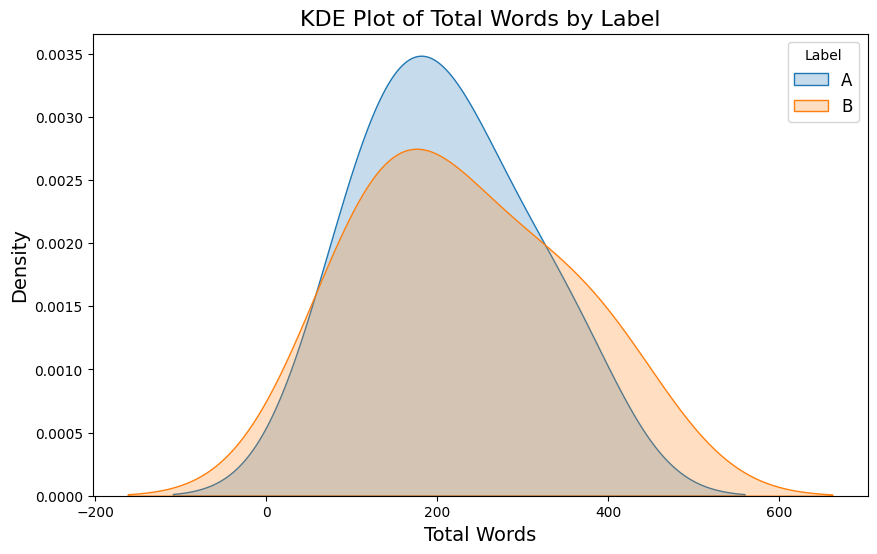

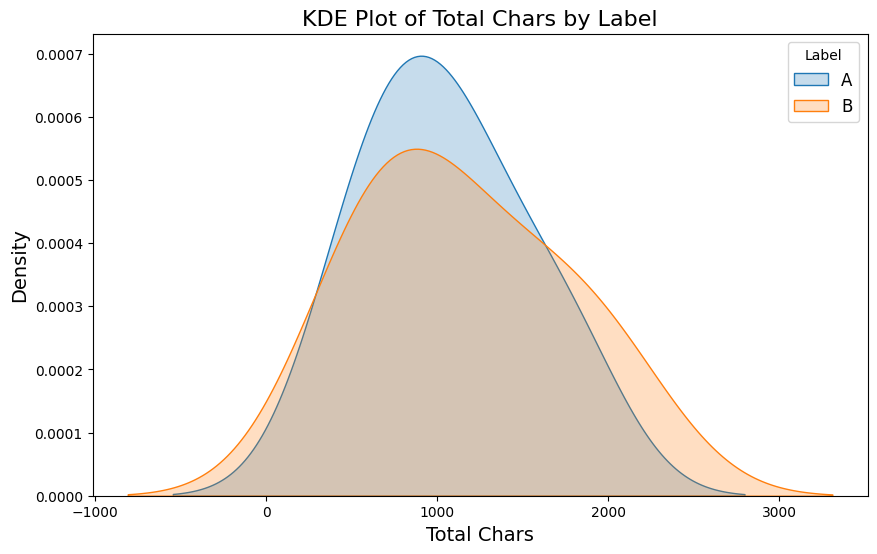

C:\Users\Kanimozhi\AppData\Local\Temp\ipykernel_11292\3674815450.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Total Words', data=df, palette='Blues')


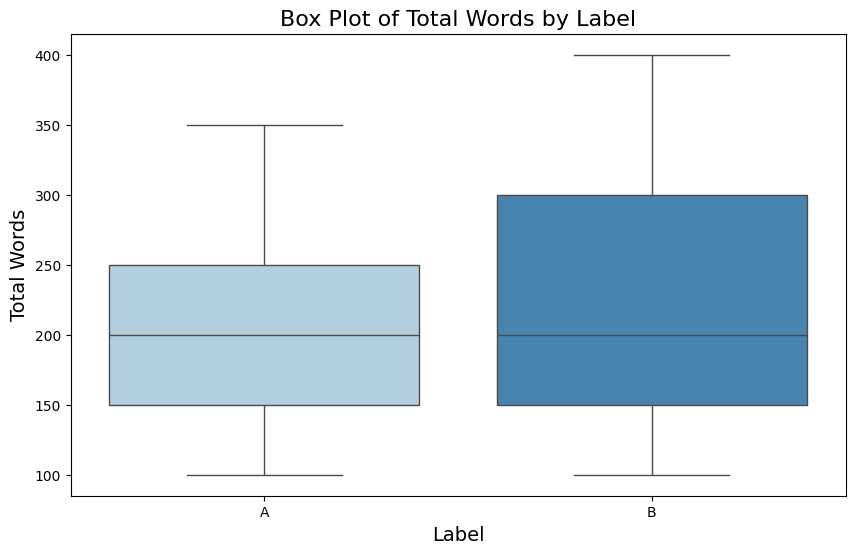

C:\Users\Kanimozhi\AppData\Local\Temp\ipykernel_11292\3674815450.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Total Chars', data=df, palette='Blues')


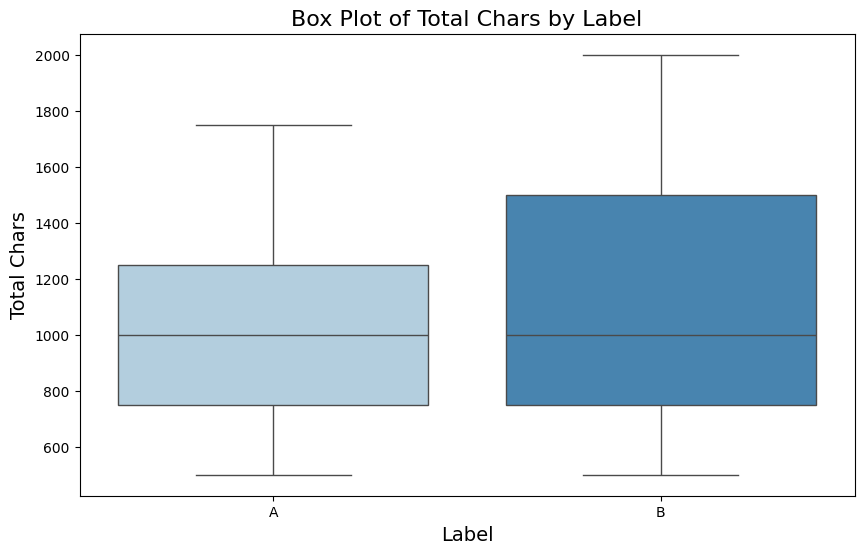

In [7]:
#12: Visualization with KDE Plots and Box plots
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('C:/Users/Kanimozhi/Pictures/mental_health.csv')
# For demonstration purposes, we'll create a sample DataFrame
data = {
    'Total Words': [100, 200, 150, 300, 250, 100, 150, 200, 350, 400],
    'Total Chars': [500, 1000, 750, 1500, 1250, 500, 750, 1000, 1750, 2000],
    'label': ['A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
}
df = pd.DataFrame(data)

# Check unique values in the columns
print("Unique Total Words:", df['Total Words'].unique())
print("Unique Total Chars:", df['Total Chars'].unique())

# KDE plot for Total Words
plt.figure(figsize=(10, 6))  # Set the figure size
for label in df['label'].unique():  # Loop through unique labels
    sns.kdeplot(
        x=df.loc[df['label'] == label, 'Total Words'],
        label=label,  # Set label for each group
        fill=True, 
        warn_singular=False
    )
plt.title('KDE Plot of Total Words by Label', fontsize=16)
plt.xlabel('Total Words', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Label', fontsize=12)
plt.show()

# KDE plot for Total Chars
plt.figure(figsize=(10, 6))  # Set the figure size
for label in df['label'].unique():  # Loop through unique labels
    sns.kdeplot(
        x=df.loc[df['label'] == label, 'Total Chars'],
        label=label,  # Set label for each group
        fill=True, 
        warn_singular=False
    )
plt.title('KDE Plot of Total Chars by Label', fontsize=16)
plt.xlabel('Total Chars', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Label', fontsize=12)
plt.show()

# Box plot for Total Words
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Total Words', data=df, palette='Blues')
plt.title('Box Plot of Total Words by Label', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Total Words', fontsize=14)
plt.show()

# Box plot for Total Chars
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Total Chars', data=df, palette='Blues')
plt.title('Box Plot of Total Chars by Label', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Total Chars', fontsize=14)
plt.show()


C:\Users\Kanimozhi\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5550 - loss: 87.6793 - val_accuracy: 0.5384 - val_loss: 4.5868
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5242 - loss: 3.0178 - val_accuracy: 0.5481 - val_loss: 1.3436
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5425 - loss: 1.1576 - val_accuracy: 0.5104 - val_loss: 0.9360
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5474 - loss: 0.8747 - val_accuracy: 0.5093 - val_loss: 0.8362
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5454 - loss: 0.7319 - val_accuracy: 0.5427 - val_loss: 0.7983
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5447 - loss: 0.7318 - val_accuracy: 0.5329 - val_loss: 0.7781
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5435 - loss: 0.7162 - val_accuracy: 0.5397 - val_loss: 0.7638
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5530 - loss: 0.7032 - val_accuracy: 0

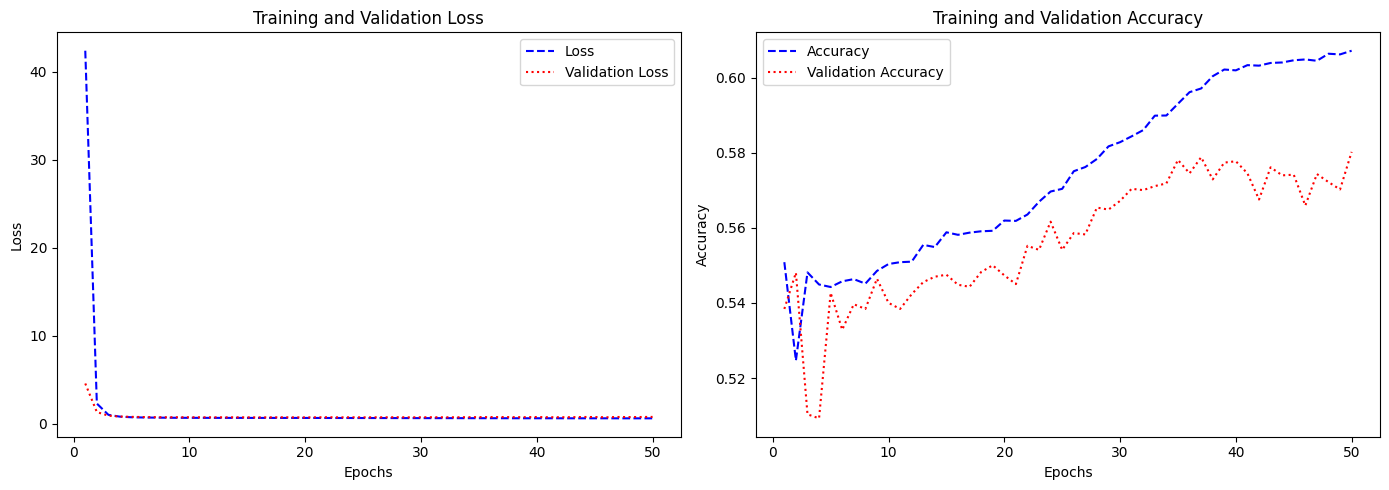

In [4]:
#13:Plot Loss and plot accuracy 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('C:/Users/Kanimozhi/Pictures/mental_health.csv')

# Assuming 'text' is the input feature and 'label' is the target
X = df['text']  # Feature: Text data
y = df['label']  # Target: Label (Assuming binary classification)

# Tokenizing and padding sequences
max_words = 5000  # Maximum number of words to keep
max_len = 100  # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=max_len)  # Padding sequences to ensure uniform length

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(max_len,)))  # Corrected input_shape for tokenized data
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

# Plotting training history (loss and accuracy)
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'b--', label='Loss')
plt.plot(epochs, history.history['val_loss'], 'r:', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'b--', label='Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


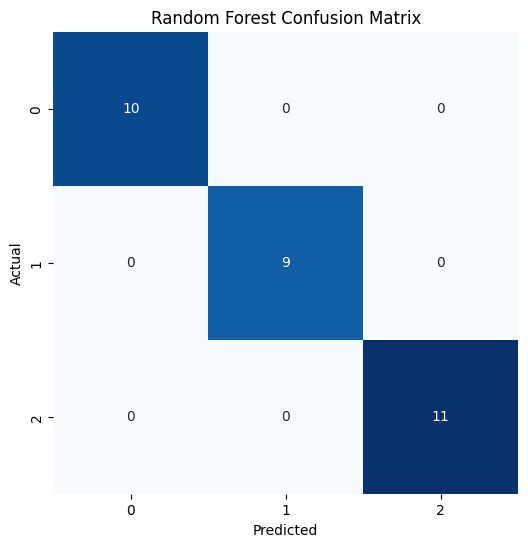

In [5]:
#14:Additional Visualizations
#a) Confusion Matrix Visualization
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace with your dataset)
# For demonstration, I'll use the Iris dataset as an example
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Generate confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


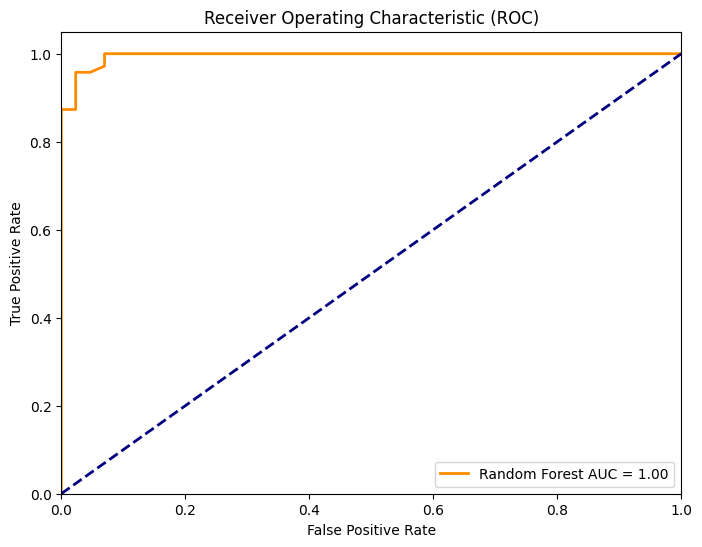

In [7]:
# b)ROC Curve and AUC Score
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset (using breast cancer dataset as an example for binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get the probabilities for the ROC curve (for the positive class)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
